In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = "../data/books.csv"   # adjust if path differs
df = pd.read_csv(DATA_PATH)
df.head()


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [2]:
df.shape, df.columns.tolist()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         100000 non-null  int64  
 9   rating        100000 non-null  float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


In [3]:
# missing
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing>0])

# duplicates (by book id or title+author)
if 'book_id' in df.columns:
    print("Duplicate book_id count:", df['book_id'].duplicated().sum())
else:
    print("Duplicate title+author count:", df.duplicated(subset=['title','author']).sum())


isbn          14482
isbn13        11435
genre         10467
desc           6772
bookformat     3228
img            3045
title             1
dtype: int64

Duplicate title+author count: 92


count    100000.000000
mean          3.833055
std           0.621237
min           0.000000
25%           3.660000
50%           3.910000
75%           4.140000
max           5.000000
Name: rating, dtype: float64

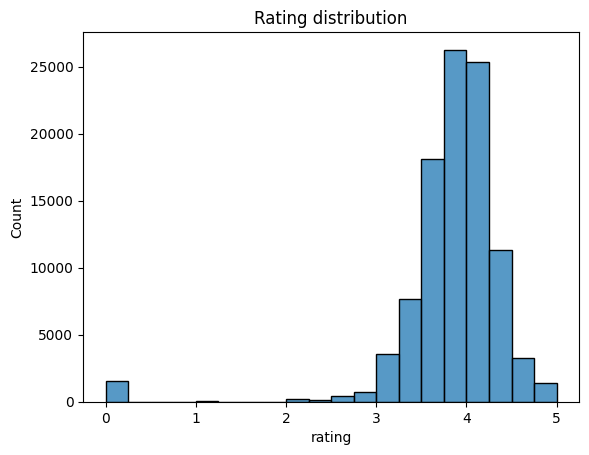

In [4]:
if 'rating' in df.columns:
    display(df['rating'].describe())
    sns.histplot(df['rating'].dropna(), bins=20)
    plt.title("Rating distribution")
    plt.show()


In [5]:
# top authors
if 'author' in df.columns:
    display(df['author'].value_counts().head(20))

# top genres (if genres is pipe/comma-separated)
if 'genres' in df.columns:
    # adapt splitting logic to your format
    exploded = df['genres'].dropna().str.split('|').explode()
    display(exploded.value_counts().head(20))

# most reviewed / highest rated books
if 'rating' in df.columns and 'title' in df.columns:
    top_by_avg = df.groupby('title')['rating'].agg(['mean','count']).sort_values(['count','mean'], ascending=False).head(20)
    display(top_by_avg)


author
Mi-Ri Hwang             137
Willy Vandersteen        76
Yu-Rang Han              75
R.L. Stine               75
Elinor M. Brent-Dyer     63
Lynn Hagen               62
Anonymous                61
Louis L'Amour            57
Lynne Graham             55
Agatha Christie          54
Joyee Flynn              53
Bonnie Bryant            48
Harry Turtledove         46
Zane Grey                45
Jim Davis                43
Piers Anthony            43
Humayun Ahmed            42
H.P. Lovecraft           41
Gabrielle Evans          39
Michael Innes            38
Name: count, dtype: int64

,mean,count
title,,
Love in the Mask,4.300937,32
Selected Poems,4.135455,22
Cinderella,3.804615,13
Honggane,4.085455,11
Redemption,4.075455,11
Coming Home,3.865455,11
Forbidden,3.629091,11
Inferno,4.096000,10
Beauty and the Beast,3.898889,9


In [6]:
if 'description' in df.columns:
    df['desc_len'] = df['description'].fillna('').str.len()
    df['desc_len'].hist(bins=50)
    plt.title('Description length distribution')
    plt.show()
    print("Percent missing description:", df['description'].isna().mean()*100)


In [7]:
if set(['user_id','rating','item_id']).issubset(df.columns) or set(['user_id','rating','book_id']).issubset(df.columns):
    uid = 'user_id'
    iid = 'book_id' if 'book_id' in df.columns else 'item_id'
    n_users = df[uid].nunique()
    n_items = df[iid].nunique()
    n_interactions = len(df)
    sparsity = 1 - (n_interactions / (n_users * n_items))
    print(f"Users: {n_users}, Items: {n_items}, Interactions: {n_interactions}")
    print("Matrix sparsity:", sparsity)
